<a href="https://colab.research.google.com/github/helghand1/MAT421/blob/main/Module_E_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hussein ElGhandour

## MAT 421

## Module E

## Continuity and Differentiation

### Introduction

In calculus, continuity and differentiation are fundamental concepts that describe the behavior of functions. A function is continuous if there are no abrupt changes, meaning that its limit at a given point matches its actual value. This ensures smoothness, which is crucial in mathematical modeling and optimization. The Extreme Value Theorem guarantees that a continuous function on a closed and bounded domain reaches both a maximum and minimum, making it essential in real-world applications like machine learning and physics. Differentiation extends these ideas by measuring how a function changes at a given point. The derivative represents the function’s instantaneous rate of change and is defined as a limit. Key results, such as the Mean Value Theorem, establish that within a continuous and differentiable function, there exists at least one point where the function’s instantaneous rate of change equals its average rate of change over an interval. In higher dimensions, differentiation generalizes to partial derivatives, the gradient, and the Jacobian, which describe how multivariable functions change and are widely used in optimization problems, especially in fields like machine learning and numerical methods.

Function: f(x) = x**3 - 3*x + 2
Derivative: f'(x) = 3*x**2 - 3
Value(s) of c satisfying MVT: [-1.1515151515151514, 1.1515151515151518]


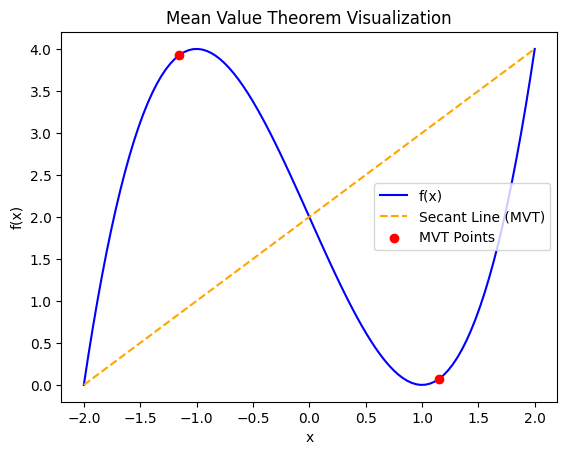

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the function
x = sp.Symbol('x')
f = x**3 - 3*x + 2  # Example function
f_prime = sp.diff(f, x)  # Compute the derivative

# Convert symbolic derivative to a numerical function
f_prime_func = sp.lambdify(x, f_prime, 'numpy')  # Ensures NumPy compatibility
f_func = sp.lambdify(x, f, 'numpy')  # Convert f(x) for plotting

# Display function and derivative
print(f"Function: f(x) = {f}")
print(f"Derivative: f'(x) = {f_prime}")

# Verify Mean Value Theorem on [a, b]
a, b = -2, 2
mvt_slope = float((f.subs(x, b) - f.subs(x, a)) / (b - a))  # Convert to Python float

# Find c where f'(c) ≈ mvt_slope
c_candidates = np.linspace(a, b, 100)
c_values = [c for c in c_candidates if np.isclose(f_prime_func(c), mvt_slope, atol=0.1)]

print(f"Value(s) of c satisfying MVT: {c_values}")

# Plot the function and secant line
x_vals = np.linspace(a, b, 100)
y_vals = f_func(x_vals)  # Compute function values
secant_line = mvt_slope * (x_vals - a) + f_func(a)  # Equation of secant line

plt.plot(x_vals, y_vals, label="f(x)", color='blue')
plt.plot(x_vals, secant_line, '--', label="Secant Line (MVT)", color='orange')

# Correctly plot MVT points at (c, f(c)) instead of (c, f'(c))
mvt_y_vals = [f_func(c) for c in c_values]  # Compute f(c) for each c
plt.scatter(c_values, mvt_y_vals, color='red', label="MVT Points", zorder=3)

# Labels and legend
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Mean Value Theorem Visualization")
plt.show()


## Taylor's Theorem

Taylor's Theorem provides a method to approximate functions using polynomials. It states that a function $ f(x) $ can be expressed as a sum of its derivatives at a specific point $ a $, plus a remainder term $ R_n(x) $ that quantifies the approximation error. The $ n $-th order Taylor series expansion of $f(x)$ around $ a $ is given by:

$$
f(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \cdots + \frac{f^{(n)}(a)}{n!}(x - a)^n + R_n(x)
$$

where $ f^{(k)}(a) $ denotes the $ k $-th derivative of $ f $ evaluated at $ a $, and $ n! $ is the factorial of $ n $. The remainder term $ R_n(x) $ represents the error introduced by truncating the series and becomes smaller as $ n $ increases, under certain conditions.

In practical applications, Taylor expansions are used to approximate complex functions with polynomials, simplifying analysis and computation. For example, the exponential function $ e^x $ can be approximated around $ x = 0 $ (Maclaurin series) as:

$$
e^x \approx 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}
$$

This polynomial approximation becomes more accurate as more terms are included.

In higher dimensions, the **multivariable Taylor expansion** involves partial derivatives and provides approximations for functions of several variables, which is essential in fields like optimization and numerical analysis.

Understanding and applying Taylor's Theorem is fundamental in numerical methods, physics, engineering, and machine learning, where function approximations are frequently required.


Taylor Series Expansion of f(x) = e^x around x = 0:
x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


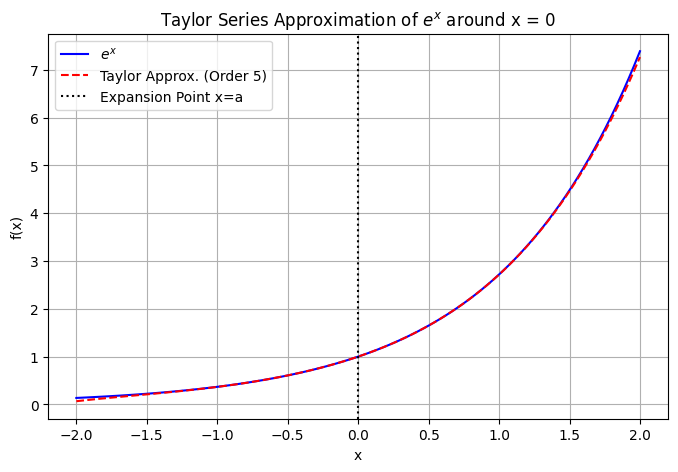

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the function and symbol
x = sp.Symbol('x')
f = sp.exp(x)  # Example function f(x) = e^x

# Define the Taylor expansion function
def taylor_series(func, a, order):
    return func.series(x, a, order+1).removeO()  # Removes the O(x^n) term

# Parameters
a = 0  # Expansion around x = 0 (Maclaurin series)
order = 5  # Degree of the polynomial approximation

# Compute Taylor expansion
taylor_expansion = taylor_series(f, a, order)
print(f"Taylor Series Expansion of f(x) = e^x around x = {a}:")
print(taylor_expansion)

# Convert to numerical function for plotting
f_func = sp.lambdify(x, f, 'numpy')  # Convert f(x) to NumPy function
taylor_func = sp.lambdify(x, taylor_expansion, 'numpy')  # Convert Taylor series

# Define x values for plotting
x_vals = np.linspace(-2, 2, 100)
y_actual = f_func(x_vals)  # Exact function values
y_taylor = taylor_func(x_vals)  # Taylor approximation values

# Plot actual function vs. Taylor approximation
plt.figure(figsize=(8,5))
plt.plot(x_vals, y_actual, label=r"$e^x$", color='blue')
plt.plot(x_vals, y_taylor, '--', label=f"Taylor Approx. (Order {order})", color='red')
plt.axvline(a, color='black', linestyle=':', label="Expansion Point x=a")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(f"Taylor Series Approximation of $e^x$ around x = {a}")
plt.legend()
plt.grid()
plt.show()


## Optimization with Gradient Descent

Gradient descent is an iterative optimization algorithm used to find a local minimum of a differentiable function. Given a function $ f(x) $, gradient descent updates $ x $ iteratively using:

$$
x_{k+1} = x_k - \alpha \nabla f(x_k)
$$

where $ \alpha $ is the **step size** (learning rate) and $ \nabla f(x_k) $ is the gradient of $ f(x) $ at $ x_k $. The negative gradient $ -\nabla f(x) $ represents the direction of steepest descent, ensuring that each step moves toward a local minimum.

### Steepest Descent Method:
The **steepest descent direction** is given by:

$$
v^* = -\frac{\nabla f(x_k)}{\|\nabla f(x_k)\|}
$$

which ensures the function decreases the fastest. The optimal step size $ \alpha_k $ at each iteration minimizes $ f(x_k - \alpha \nabla f(x_k)) $, improving convergence.

### Convergence:
Gradient descent guarantees that function values decrease monotonically:

$$
f(x_{k+1}) \leq f(x_k)
$$

if $ \alpha_k $ is chosen optimally. This ensures steady progress toward a minimum.

Gradient descent plays a crucial role in solving optimization problems efficiently, particularly when analytical solutions are impractical. In this section, we will implement gradient descent numerically to minimize a given function.


Step 0: x = 4.400000
Step 1: x = 3.920000
Step 2: x = 3.536000
Step 3: x = 3.228800
Step 4: x = 2.983040
Step 5: x = 2.786432
Step 6: x = 2.629146
Step 7: x = 2.503316
Step 8: x = 2.402653
Step 9: x = 2.322123
Step 10: x = 2.257698
Step 11: x = 2.206158
Step 12: x = 2.164927
Step 13: x = 2.131941
Step 14: x = 2.105553
Step 15: x = 2.084442
Step 16: x = 2.067554
Step 17: x = 2.054043
Step 18: x = 2.043235
Step 19: x = 2.034588
Step 20: x = 2.027670
Step 21: x = 2.022136
Step 22: x = 2.017709
Step 23: x = 2.014167
Step 24: x = 2.011334
Step 25: x = 2.009067
Step 26: x = 2.007254
Step 27: x = 2.005803
Step 28: x = 2.004642
Step 29: x = 2.003714
Step 30: x = 2.002971
Step 31: x = 2.002377
Step 32: x = 2.001901
Step 33: x = 2.001521
Step 34: x = 2.001217
Step 35: x = 2.000974
Step 36: x = 2.000779
Step 37: x = 2.000623
Step 38: x = 2.000498
Step 39: x = 2.000399
Step 40: x = 2.000319
Step 41: x = 2.000255
Step 42: x = 2.000204
Step 43: x = 2.000163
Step 44: x = 2.000131
Step 45: x = 2.00010

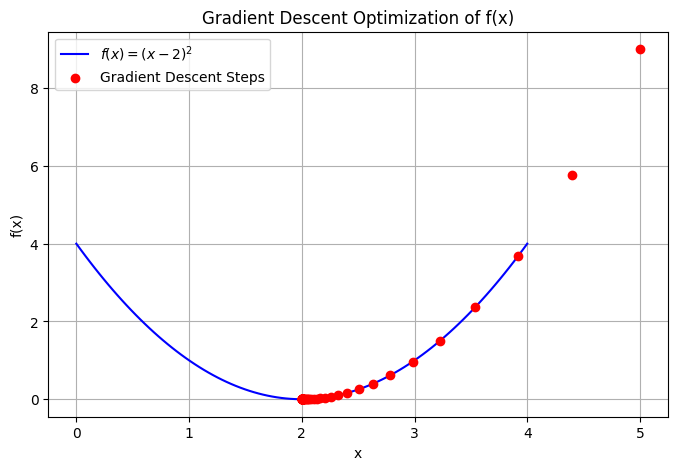

In [17]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define the function and its derivative
x = sp.Symbol('x')
f = x**2 - 4*x + 4  # Example function: f(x) = (x - 2)^2
grad_f = sp.diff(f, x)  # Compute derivative (gradient)

# Convert symbolic functions to numerical functions
f_func = sp.lambdify(x, f, 'numpy')  # Function f(x)
grad_f_func = sp.lambdify(x, grad_f, 'numpy')  # Gradient ∇f(x)

# Gradient Descent Algorithm
def gradient_descent(f_grad, x_init, alpha, tol=1e-6, max_iter=100):
    x_k = x_init
    x_history = [x_k]

    for i in range(max_iter):
        grad_val = f_grad(x_k)
        x_k_new = x_k - alpha * grad_val  # Gradient Descent Update Rule

        # Print the step number and x_k value
        print(f"Step {i}: x = {x_k_new:.6f}")

        x_history.append(x_k_new)
        if abs(x_k_new - x_k) < tol:  # Convergence check
            break
        x_k = x_k_new

    return x_k, np.array(x_history)

# Parameters
x_init = 5  # Initial guess
alpha = 0.1  # Step size (learning rate)

# Run Gradient Descent
x_min, x_vals = gradient_descent(grad_f_func, x_init, alpha)

print(f"Approximate minimum found at x = {x_min:.6f}")

# Visualization
x_range = np.linspace(0, 4, 100)  # Range for function plot
y_vals = f_func(x_range)

plt.figure(figsize=(8,5))
plt.plot(x_range, y_vals, label=r"$f(x) = (x-2)^2$", color='blue')
plt.scatter(x_vals, f_func(x_vals), color='red', marker='o', label="Gradient Descent Steps", zorder=3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Gradient Descent Optimization of f(x)")
plt.grid()
plt.show()
